# Ali Keramati
## CA 5 Phase 2

# Description
In this project, we intend to investigate some issues related to neural networks with the TensorFlow library and using the Keras high-level interface. Actually, we intend to use neural networks to recognize the English alphabet based on their image.

# Introducing the data set
Alphabets Handwritten Z-A Database is a collection of handwritten images of the English alphabet. This dataset contains 450,372 images with their corresponding labels.

# Goal

The aim of this project is to become more familiar with the Keras and TensorFlow libraries in order to create a neural network model for predicting the type of letters of an alphabet in an image.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import classification_report

# Phase 0: preprocess


### 1. read csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_CA5/A_Z Handwritten Data.csv", dtype="uint8")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. split labels and data

In [ ]:
label_df = pd.DataFrame(df['0'])

In [ ]:
data_df = pd.DataFrame()
data_df = df.iloc[:, 1:]

### 3. reshape 28*28

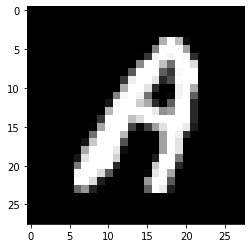

In [ ]:
new_data = []
for index, row in data_df.iterrows():
    image = np.reshape(np.array(row), (28,28))
    new_data.append(image / 255)

plt.imshow(new_data[0], cmap='gray', interpolation='nearest')
plt.show()

### 4. number of datas and classes

In [ ]:
print("number of data: ", len(data_df))

number of data:  372450


In [ ]:
n_classes = len(pd.unique(label_df['0']))
print("number of classes: ", n_classes)

number of classes:  26


### 5. number of images in each class

In [ ]:
labels_count = label_df.value_counts().sort_index()

In [ ]:
class_names = list(string.ascii_lowercase)
counter = 0
for count in labels_count:
  print(class_names[counter], count)
  counter += 1

a 13869
b 8668
c 23409
d 10134
e 11440
f 1163
g 5762
h 7218
i 1120
j 8493
k 5603
l 11586
m 12336
n 19010
o 57825
p 19341
q 5812
r 11566
s 48419
t 22495
u 29008
v 4182
w 10784
x 6272
y 10859
z 6076


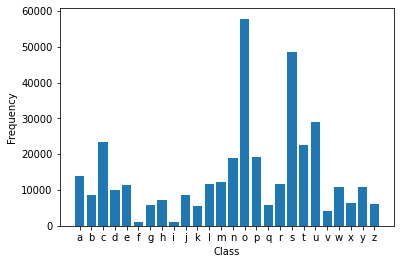

In [ ]:
plt.bar(class_names, labels_count)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 6. show image in each class

In [ ]:
label_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
372445,25
372446,25
372447,25
372448,25


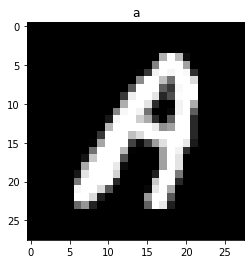

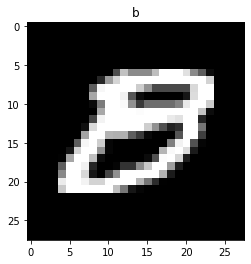

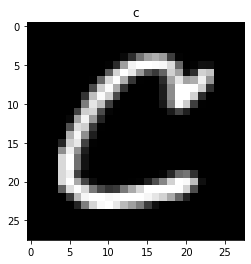

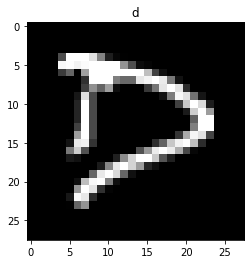

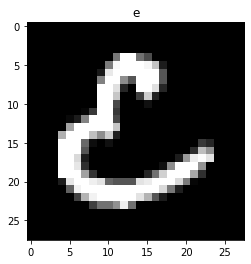

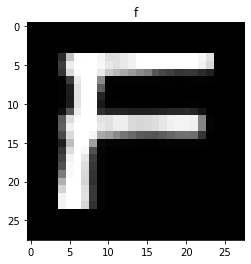

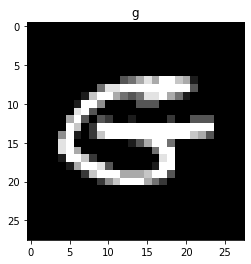

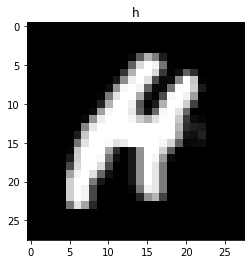

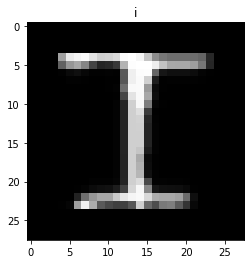

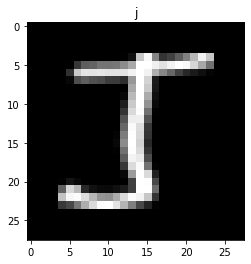

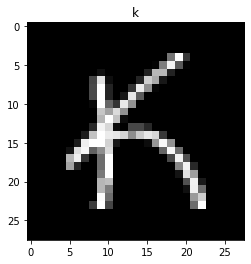

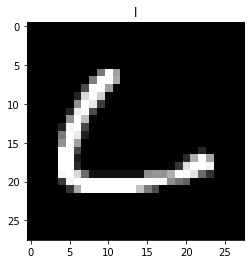

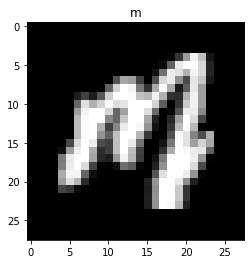

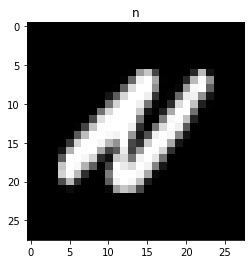

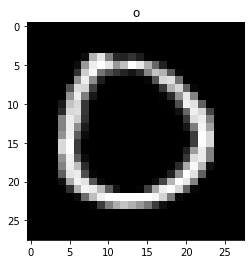

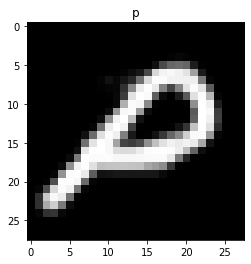

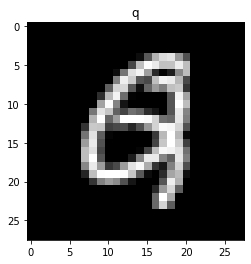

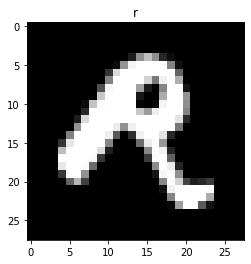

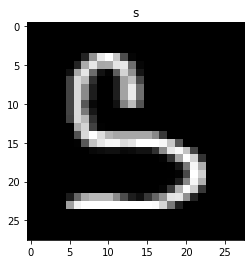

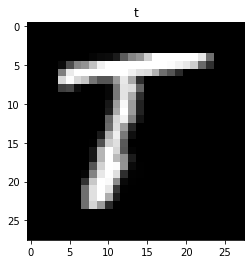

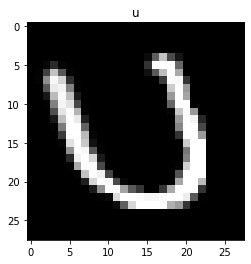

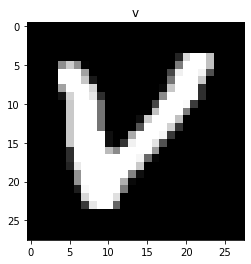

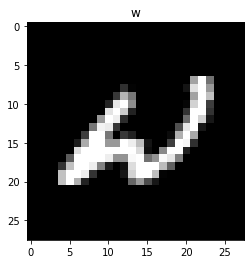

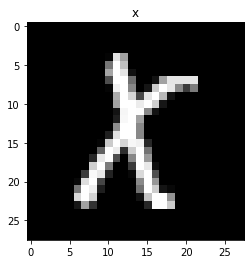

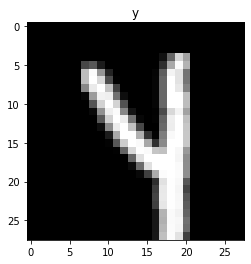

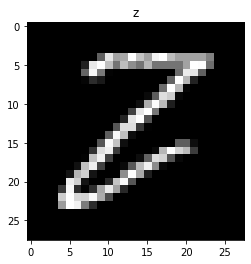

In [ ]:
for i in range(0, 26):
    # df.index[label_df == ].tolist()
    curr_class = new_data[df.index[label_df['0'] == i].tolist()[0]]
    plt.imshow(curr_class, cmap='gray', interpolation='nearest')
    plt.title(class_names[i])
    plt.show()

### 7. split data into train and test

In [ ]:
train, test = train_test_split(data_df, random_state=42, test_size=0.25)

### 8. one hot encoding

As seen above, labels are one hot encoded in each iteration. We should prefer using the one hot encoding method, because the categorical labels(alphabets) present in the dataset are not ordinal. Other encoding methods like Label Encoding, encode labels with an ordinal ranking, in other words, they will read a higher number as better or more important than a lower number, this can lead to issues with predictions and poor performance.
Additionally, we must also one hot encode the target variable so that we can develop a model that predicts the probability of a datapoint belonging to each class.

In [ ]:
onehot_labels = pd.get_dummies(label_df, columns = ['0'])
onehot_labels

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
len(new_data)

372450

In [ ]:
new_df = pd.DataFrame()
new_df['pixels'] = None

In [ ]:
onehot_labels

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_df['pixels'] = new_data

In [ ]:
new_df

,pixels
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...
372445,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
372446,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
372447,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
372448,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_df, onehot_labels,  random_state=42, test_size=0.25)

In [ ]:
x_train

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
154375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25
154375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228919,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
350151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73268,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Phase 2

In [ ]:
my_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=my_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train=(x_train)/(255)

In [ ]:
x_train.max()

0.1      0.000000
0.2      0.000000
0.3      0.000000
0.4      0.000000
0.5      0.000000
           ...   
0.644    0.760784
0.645    0.403922
0.646    0.776471
0.647    0.321569
0.648    0.015686
Length: 784, dtype: float64

In [ ]:
x_test = x_test / 255

In [ ]:
x_train_arr = x_train.to_numpy()
y_train_arr = y_train.to_numpy()
x_test_arr = x_test.to_numpy()
y_test_arr = y_test.to_numpy()

log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.9410 - accuracy: 0.7417 - val_loss: 0.6023 - val_accuracy: 0.8288
Epoch 2/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.4977 - accuracy: 0.8652 - val_loss: 0.4530 - val_accuracy: 0.8764
Epoch 3/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.4145 - accuracy: 0.8875 - val_loss: 0.3801 - val_accuracy: 0.8965
Epoch 4/10
8730/8730 [==============================] - 22s 3ms/step - loss: 0.3662 - accuracy: 0.9004 - val_loss: 0.3461 - val_accuracy: 0.9049
Epoch 5/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.3357 - accuracy: 0.9088 - val_loss: 0.3203 - val_accuracy: 0.9119
Epoch 6/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.3143 - accuracy: 0.9149 - val_loss: 0.3072 - val_accuracy: 0.9155
Epoch 7/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.2983 - accuracy: 0.9191 - val_loss: 0.2914 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 26)                546       
                                                                 
Total params: 16,666
Trainable params: 16,666
Non-trainable params: 0
_________________________________________________________________


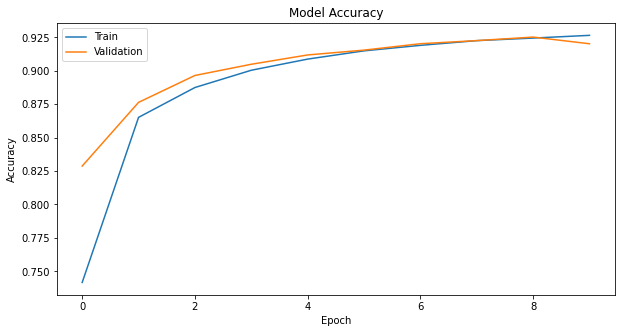

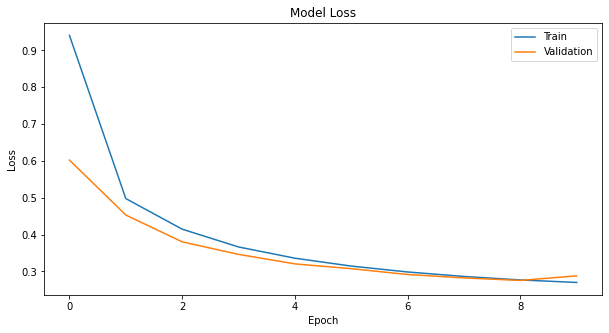

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_train_pred = np.argmax(model.predict(x_train_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_train_arr, axis=1)
print(classification_report(rounded_labels, x_train_pred))

8730/8730 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10413
           1       0.88      0.87      0.87      6548
           2       0.91      0.96      0.93     17458
           3       0.86      0.85      0.85      7630
           4       0.96      0.78      0.86      8637
           5       0.94      0.81      0.87       879
           6       0.90      0.80      0.84      4311
           7       0.93      0.73      0.82      5400
           8       0.89      0.84      0.86       820
           9       0.92      0.81      0.87      6401
          10       0.87      0.81      0.84      4182
          11       0.93      0.95      0.94      8730
          12       0.80      0.96      0.88      9273
          13       0.85      0.92      0.88     14339
          14       0.94      0.98      0.96     43227
          15       0.93      0.98      0.95     14443
          16       0.92

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3456
           1       0.88      0.87      0.87      2120
           2       0.92      0.95      0.94      5951
           3       0.84      0.85      0.84      2504
           4       0.96      0.78      0.86      2803
           5       0.96      0.82      0.88       284
           6       0.90      0.79      0.84      1451
           7       0.90      0.73      0.81      1818
           8       0.86      0.86      0.86       300
           9       0.93      0.81      0.87      2092
          10       0.89      0.79      0.84      1421
          11       0.92      0.95      0.94      2856
          12       0.80      0.96      0.88      3063
          13       0.84      0.91      0.88      4671
          14       0.94      0.98      0.96     14598
          15       0.92      0.97      0.95      4898
          16       0.92 

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=my_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train_arr = x_train.to_numpy()
y_train_arr = y_train.to_numpy()
x_test_arr = x_test.to_numpy()
y_test_arr = y_test.to_numpy()

log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 22s 2ms/step - loss: 0.7480 - accuracy: 0.7927 - val_loss: 0.4762 - val_accuracy: 0.8710
Epoch 2/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.4197 - accuracy: 0.8855 - val_loss: 0.3749 - val_accuracy: 0.8967
Epoch 3/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.3541 - accuracy: 0.9023 - val_loss: 0.3398 - val_accuracy: 0.9056
Epoch 4/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.3183 - accuracy: 0.9125 - val_loss: 0.3052 - val_accuracy: 0.9162
Epoch 5/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.2947 - accuracy: 0.9185 - val_loss: 0.2832 - val_accuracy: 0.9228
Epoch 6/10
8730/8730 [==============================] - 22s 3ms/step - loss: 0.2785 - accuracy: 0.9226 - val_loss: 0.2809 - val_accuracy: 0.9227
Epoch 7/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.2659 - accuracy: 0.9264 - val_loss: 0.2772 - val_ac

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                15700     
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 26)                546       
                                                                 
Total params: 16,666
Trainable params: 16,666
Non-trainable params: 0
_________________________________________________________________


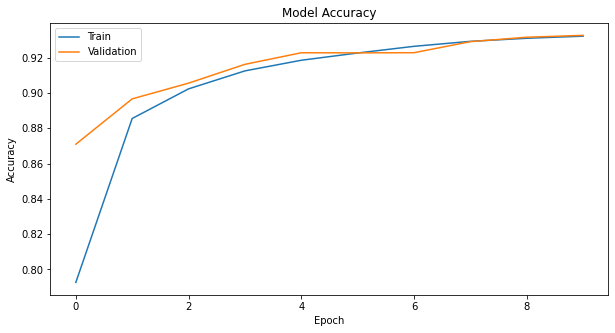

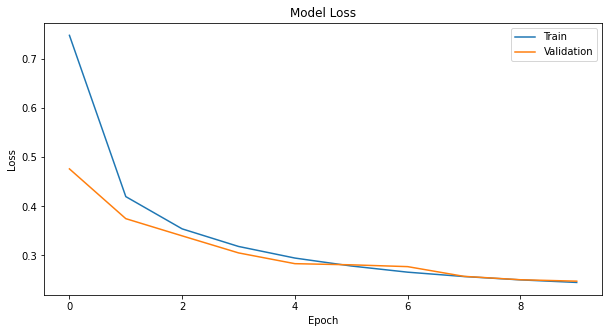

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_train_pred = np.argmax(model.predict(x_train_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_train_arr, axis=1)
print(classification_report(rounded_labels, x_train_pred))

8730/8730 [==============================] - 16s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10413
           1       0.88      0.91      0.89      6548
           2       0.96      0.95      0.95     17458
           3       0.91      0.84      0.87      7630
           4       0.91      0.89      0.90      8637
           5       0.90      0.84      0.87       879
           6       0.86      0.87      0.86      4311
           7       0.87      0.83      0.85      5400
           8       0.86      0.80      0.83       820
           9       0.85      0.93      0.89      6401
          10       0.88      0.85      0.86      4182
          11       0.95      0.96      0.96      8730
          12       0.94      0.94      0.94      9273
          13       0.91      0.91      0.91     14339
          14       0.97      0.97      0.97     43227
          15       0.97      0.94      0.96     14443
          16       0.80

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      3456
           1       0.86      0.90      0.88      2120
           2       0.96      0.94      0.95      5951
           3       0.90      0.85      0.87      2504
           4       0.91      0.89      0.90      2803
           5       0.91      0.82      0.87       284
           6       0.86      0.86      0.86      1451
           7       0.87      0.84      0.85      1818
           8       0.87      0.82      0.84       300
           9       0.84      0.92      0.88      2092
          10       0.88      0.84      0.86      1421
          11       0.95      0.97      0.96      2856
          12       0.93      0.94      0.93      3063
          13       0.91      0.90      0.91      4671
          14       0.96      0.97      0.97     14598
          15       0.97      0.94      0.96      4898
          16       0.80 

# Phase 3

## Part 1

### 1. What is momentum?
**What is momentum and why is it useful?**<br>
Momentum is a widely-used strategy for accelerating the convergence of gradient-based optimization techniques.

Momentum is an average of gradients that changes during the time and we use it to update weight in each step. Therefore, it leads to faster convergence.

Normally, the updates to weights are product of learning rate and the gradiant of error/loss. But if we use momentum, we add a new term. For each new weight update, we add the product of momentum value and the previous update. So the previous updates are considered on each. Because of this one batch can't change the direction of descent if most of the previous batchs were moving toward a direction.

Using momentum the learning will happen faster as we will have bigger updates. It can also help us to skip the local minima because of the big update.
Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction $\gamma$
of the update vector of the past time step to the current update vector:
$Δ w_{i,j} = (\gamma*Δ w_{i,j}^{t-1}) - (η * \frac{\partial E}{\partial w_{i,j}}) ⇒ w_{i,j} = w_{i,j} + Δ w_{i,j}$ <br>
The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation. This leads to speeding up learning and not getting stuck in local minima.

### 2. Different momentums

In [ ]:
my_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=False, name='SGD')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=my_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 24s 3ms/step - loss: 0.7368 - accuracy: 0.7942 - val_loss: 0.4310 - val_accuracy: 0.8823
Epoch 2/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.3819 - accuracy: 0.8954 - val_loss: 0.3402 - val_accuracy: 0.9073
Epoch 3/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.3224 - accuracy: 0.9104 - val_loss: 0.3053 - val_accuracy: 0.9144
Epoch 4/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.2901 - accuracy: 0.9195 - val_loss: 0.2823 - val_accuracy: 0.9213
Epoch 5/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.2697 - accuracy: 0.9250 - val_loss: 0.2671 - val_accuracy: 0.9268
Epoch 6/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.2560 - accuracy: 0.9285 - val_loss: 0.2503 - val_accuracy: 0.9310
Epoch 7/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.2461 - accuracy: 0.9311 - val_loss: 0.2657 - val_ac

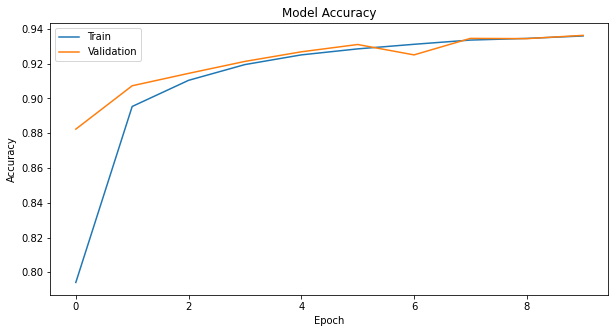

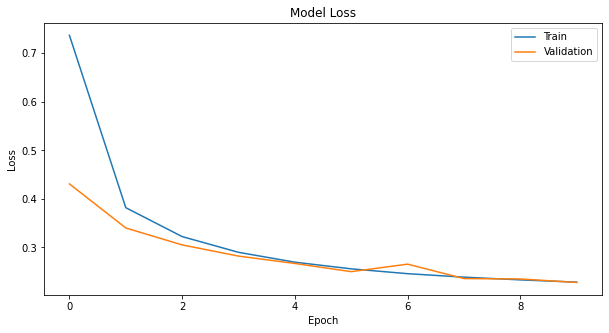

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3456
           1       0.93      0.86      0.89      2120
           2       0.96      0.96      0.96      5951
           3       0.90      0.88      0.89      2504
           4       0.92      0.88      0.90      2803
           5       0.92      0.79      0.85       284
           6       0.82      0.86      0.84      1451
           7       0.89      0.83      0.86      1818
           8       0.90      0.80      0.84       300
           9       0.92      0.89      0.90      2092
          10       0.85      0.86      0.86      1421
          11       0.96      0.95      0.95      2856
          12       0.93      0.94      0.94      3063
          13       0.89      0.92      0.91      4671
          14       0.97      0.97      0.97     14598
          15       0.94      0.97      0.95      4898
          16       0.85 

As can be seen above, the model with momentum = 0.5 has a little increase in f1-accuracy compared to model with momentum = 0.

In [ ]:
my_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='SGD')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=my_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.4926 - accuracy: 0.8620 - val_loss: 0.3444 - val_accuracy: 0.9041
Epoch 2/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.3204 - accuracy: 0.9097 - val_loss: 0.2891 - val_accuracy: 0.9193
Epoch 3/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.2902 - accuracy: 0.9172 - val_loss: 0.2826 - val_accuracy: 0.9192
Epoch 4/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.2769 - accuracy: 0.9212 - val_loss: 0.2809 - val_accuracy: 0.9192
Epoch 5/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.2662 - accuracy: 0.9244 - val_loss: 0.2748 - val_accuracy: 0.9233
Epoch 6/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.2604 - accuracy: 0.9260 - val_loss: 0.2427 - val_accuracy: 0.9306
Epoch 7/10
8730/8730 [==============================] - 22s 2ms/step - loss: 0.2537 - accuracy: 0.9279 - val_loss: 0.2501 - val_ac

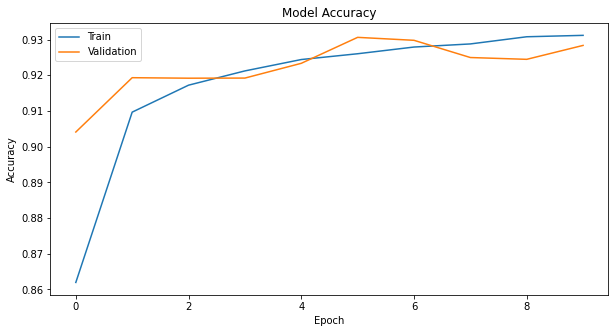

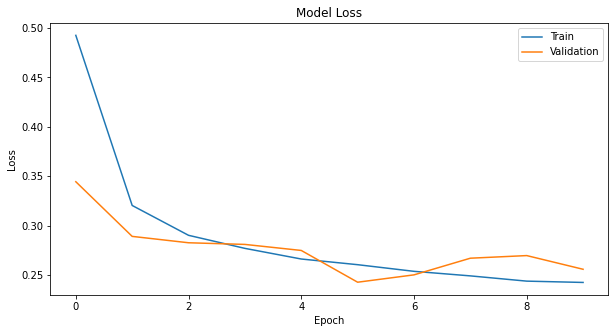

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      3456
           1       0.91      0.84      0.87      2120
           2       0.94      0.96      0.95      5951
           3       0.91      0.88      0.89      2504
           4       0.93      0.89      0.91      2803
           5       0.94      0.81      0.87       284
           6       0.92      0.81      0.86      1451
           7       0.65      0.93      0.76      1818
           8       0.92      0.79      0.85       300
           9       0.92      0.88      0.90      2092
          10       0.81      0.87      0.84      1421
          11       0.93      0.98      0.95      2856
          12       0.94      0.93      0.94      3063
          13       0.94      0.87      0.90      4671
          14       0.98      0.96      0.97     14598
          15       0.96      0.94      0.95      4898
          16       0.77 

As can be seen above, the model with momentum = 0.9 has no increase in f1-accuracy compared to model with momentum = 0.

In [ ]:
my_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.98, nesterov=False, name='SGD')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=my_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.8111 - accuracy: 0.7811 - val_loss: 0.7543 - val_accuracy: 0.8059
Epoch 2/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.6889 - accuracy: 0.8219 - val_loss: 0.6837 - val_accuracy: 0.8284
Epoch 3/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.6026 - accuracy: 0.8395 - val_loss: 0.5128 - val_accuracy: 0.8580
Epoch 4/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.4667 - accuracy: 0.8710 - val_loss: 0.4147 - val_accuracy: 0.8864
Epoch 5/10
8730/8730 [==============================] - 18s 2ms/step - loss: 0.4040 - accuracy: 0.8886 - val_loss: 0.3911 - val_accuracy: 0.8912
Epoch 6/10
8730/8730 [==============================] - 19s 2ms/step - loss: 0.3818 - accuracy: 0.8949 - val_loss: 0.3676 - val_accuracy: 0.8989
Epoch 7/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.3664 - accuracy: 0.8988 - val_loss: 0.3522 - val_ac

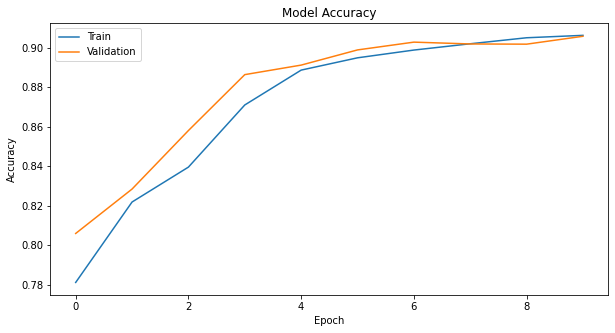

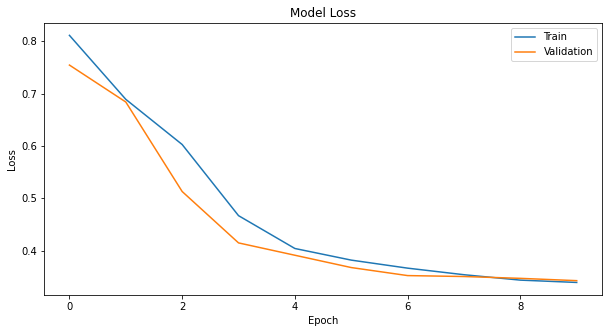

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3456
           1       0.88      0.81      0.84      2120
           2       0.93      0.94      0.93      5951
           3       0.84      0.83      0.84      2504
           4       0.89      0.85      0.87      2803
           5       0.86      0.87      0.86       284
           6       0.88      0.77      0.82      1451
           7       0.82      0.67      0.74      1818
           8       0.98      0.40      0.57       300
           9       0.91      0.82      0.86      2092
          10       0.83      0.72      0.77      1421
          11       0.93      0.94      0.93      2856
          12       0.87      0.92      0.90      3063
          13       0.78      0.89      0.83      4671
          14       0.96      0.96      0.96     14598
          15       0.92      0.96      0.94      4898
          16       0.82 

As can be seen above, this model with momentum = 0.98 is not accurate compared to the model with momentum = 0, because increasing the momentum leads to jumping over global minimum/maximum.

---



Note that while bigger momentum might seem like a good choice, by choosing greater values, we are averaging over bigger numbers of points and therefore taking bigger steps at each run.

We can clearly see the impact of taking bigger steps that have generated some gaps in our plots. However, accuracy is doing much better with momentum equal to 0.5.

### 3. impact of increasing momentum
**Does the result always improve with increasing momentum?**<br>
If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step.

### 4. adam optimizer


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train_arr = x_train.to_numpy()
y_train_arr = y_train.to_numpy()
x_test_arr = x_test.to_numpy()
y_test_arr = y_test.to_numpy()

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 27s 3ms/step - loss: 1.1228 - accuracy: 0.6955 - val_loss: 0.5746 - val_accuracy: 0.8435
Epoch 2/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.4946 - accuracy: 0.8631 - val_loss: 0.3934 - val_accuracy: 0.8917
Epoch 3/10
8730/8730 [==============================] - 24s 3ms/step - loss: 0.3749 - accuracy: 0.8958 - val_loss: 0.3625 - val_accuracy: 0.8999
Epoch 4/10
8730/8730 [==============================] - 20s 2ms/step - loss: 0.3345 - accuracy: 0.9071 - val_loss: 0.3236 - val_accuracy: 0.9141
Epoch 5/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.3135 - accuracy: 0.9135 - val_loss: 0.2978 - val_accuracy: 0.9191
Epoch 6/10
8730/8730 [==============================] - 22s 3ms/step - loss: 0.3049 - accuracy: 0.9161 - val_loss: 0.3287 - val_accuracy: 0.9081
Epoch 7/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.2942 - accuracy: 0.9187 - val_loss: 0.3155 - val_ac

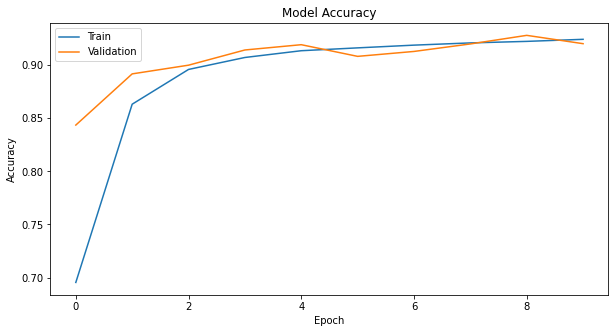

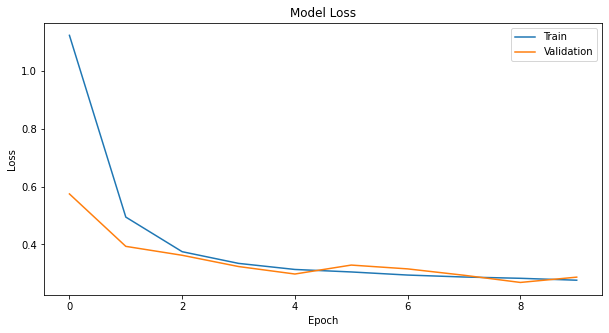

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3456
           1       0.85      0.84      0.85      2120
           2       0.97      0.92      0.94      5951
           3       0.94      0.73      0.82      2504
           4       0.85      0.89      0.87      2803
           5       0.75      0.93      0.83       284
           6       0.89      0.73      0.80      1451
           7       0.70      0.88      0.78      1818
           8       0.94      0.83      0.88       300
           9       0.81      0.85      0.83      2092
          10       0.77      0.91      0.83      1421
          11       0.96      0.96      0.96      2856
          12       0.91      0.93      0.92      3063
          13       0.92      0.90      0.91      4671
          14       0.94      0.99      0.96     14598
          15       0.97      0.95      0.96      4898
          16       0.89 

As can be seen above, we achieved higher accuracy with Optimizer SGD, because
ADAM-alike adaptive gradient algorithms suffer from worse generalization performance than SGD despite their faster training speed.

# Part 2
## impact of epoch

### 1. epoch = 20

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=20, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/20
8730/8730 [==============================] - 24s 3ms/step - loss: 0.9111 - accuracy: 0.7687 - val_loss: 0.5257 - val_accuracy: 0.8586
Epoch 2/20
8730/8730 [==============================] - 23s 3ms/step - loss: 0.4835 - accuracy: 0.8697 - val_loss: 0.4261 - val_accuracy: 0.8845
Epoch 3/20
8730/8730 [==============================] - 23s 3ms/step - loss: 0.4115 - accuracy: 0.8886 - val_loss: 0.3976 - val_accuracy: 0.8915
Epoch 4/20
8730/8730 [==============================] - 42s 5ms/step - loss: 0.3766 - accuracy: 0.8982 - val_loss: 0.3490 - val_accuracy: 0.9060
Epoch 5/20
8730/8730 [==============================] - 24s 3ms/step - loss: 0.3543 - accuracy: 0.9045 - val_loss: 0.3450 - val_accuracy: 0.9073
Epoch 6/20
8730/8730 [==============================] - 23s 3ms/step - loss: 0.3395 - accuracy: 0.9082 - val_loss: 0.3492 - val_accuracy: 0.9038
Epoch 7/20
8730/8730 [==============================] - 23s 3ms/step - loss: 0.3290 - accuracy: 0.9105 - val_loss: 0.3292 - val_ac

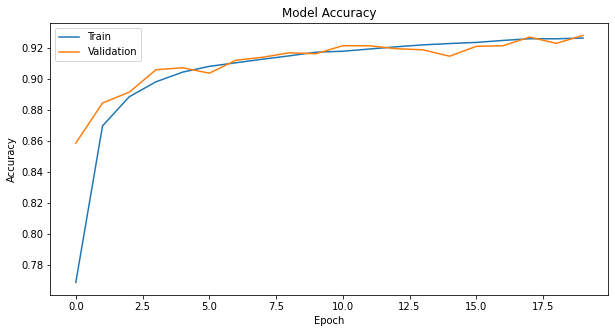

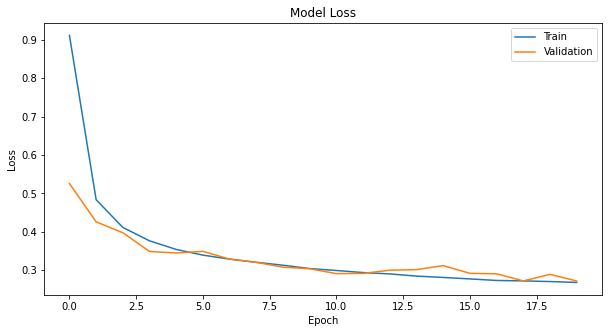

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3456
           1       0.78      0.93      0.85      2120
           2       0.94      0.96      0.95      5951
           3       0.93      0.76      0.84      2504
           4       0.92      0.87      0.89      2803
           5       0.96      0.86      0.91       284
           6       0.83      0.85      0.84      1451
           7       0.77      0.88      0.82      1818
           8       0.88      0.87      0.87       300
           9       0.86      0.90      0.88      2092
          10       0.89      0.82      0.85      1421
          11       0.97      0.94      0.96      2856
          12       0.91      0.94      0.92      3063
          13       0.91      0.91      0.91      4671
          14       0.95      0.98      0.96     14598
          15       0.97      0.94      0.95      4898
          16       0.88 

### 2. some epochs?
**Why multiple epochs are needed?** <br>
Our main goal is to get good performance on our test data, this usually means taking more than one pass over the training data (it's typical that gradient descent doesn't reach a minimum after the first epoch).

Now if performance on the training set improves while the performance on the hold-out data gets worse, overfitting happens, so prolonged training can cause overfitting. Training a model enough just means that the model gets better.

Generally, we test our training data with different epoch sizes so that we can find the perfect size for our network in such a way that we reach better perfomance and overfitting doesn't happen.

Note that it is a good practice to check multiple rounds of update (epochs) to estimate models, and this isn't limited to neural networks. Infact, this is common to all iterative model estimation procedures like logistic regression, SVM and gradient boosting.

Additionally, and independent of any out-of-sample considerations, it's typical that an iterative optimizer like SGD doesn't reach a (global or local) minima after the first epoch because it cannot find the optimal parameters (weights) in one pass. <br> <br>


### 3. more epochs?
**Is it always useful to use more ephochs in training? What are the solutions to deal with probable problems of encreasing epochs?** <br>
No, because as the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting.<br>
Solution: Early stopping is a method that allows us to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset. Actually we should set the number of epochs as high as possible and terminate the training when validation error starts increasing.


If we set the number of epochs to a very large number, it may lead to have and overfitted model, because we train the data for many times and our model will start to model the noises in our data and it is a sign of overfitting and the accuracy of the test data will be reduced.



# Part 3
## impact of loss function

### 1. MSE

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 25s 3ms/step - loss: 0.0675 - accuracy: 0.1230 - val_loss: 0.0670 - val_accuracy: 0.1285
Epoch 2/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.0669 - accuracy: 0.1305 - val_loss: 0.0670 - val_accuracy: 0.1285
Epoch 3/10
8730/8730 [==============================] - 28s 3ms/step - loss: 0.0669 - accuracy: 0.1305 - val_loss: 0.0670 - val_accuracy: 0.1285
Epoch 4/10
8730/8730 [==============================] - 35s 4ms/step - loss: 0.0669 - accuracy: 0.1305 - val_loss: 0.0670 - val_accuracy: 0.1285
Epoch 5/10
8730/8730 [==============================] - 26s 3ms/step - loss: 0.0669 - accuracy: 0.1305 - val_loss: 0.0670 - val_accuracy: 0.1285
Epoch 6/10
8730/8730 [==============================] - 27s 3ms/step - loss: 0.0669 - accuracy: 0.1305 - val_loss: 0.0670 - val_accuracy: 0.1285
Epoch 7/10
8730/8730 [==============================] - 37s 4ms/step - loss: 0.0669 - accuracy: 0.1305 - val_loss: 0.0670 - val_ac

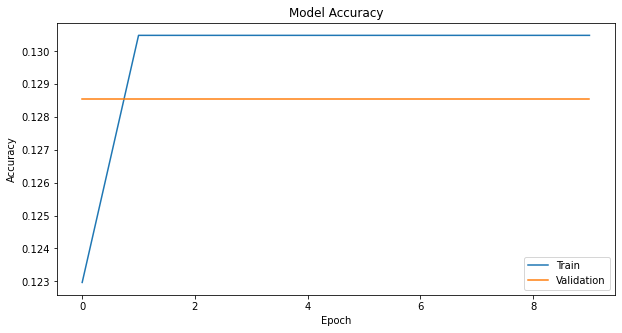

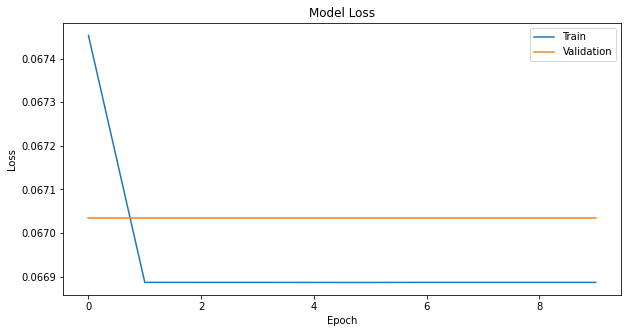

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3456
           1       0.00      0.00      0.00      2120
           2       0.00      0.00      0.00      5951
           3       0.00      0.00      0.00      2504
           4       0.00      0.00      0.00      2803
           5       0.00      0.00      0.00       284
           6       0.00      0.00      0.00      1451
           7       0.00      0.00      0.00      1818
           8       0.00      0.00      0.00       300
           9       0.00      0.00      0.00      2092
          10       0.00      0.00      0.00      1421
          11       0.00      0.00      0.00      2856
          12       0.00      0.00      0.00      3063
          13       0.00      0.00      0.00      4671
          14       0.00      0.00      0.00     14598
          15       0.00      0.00      0.00      4898
          16       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As can be seen above, accuracy and loss are both fixed and stuck in local minima.

### 2. Why MSE is not proper for classification?
Note that there are two main reasons why MSE isn't a good loss function for classification problems:

Using MSE means that we assume that the underlying data has been generated from a normal distribution. In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories is not from a normal distribution but a Bernoulli distribution. If we use maximum likelihood estimation, assuming that the data is from a normal distribution, we get the MSE as a Cost function for optimizing our model.

The MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞,∞ ), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.


**When to use mean squared error?** <br>
MSE is a good choice for a Cost function when we are doing Linear Regression (i.e fitting a line through data for extrapolation). In the absence of any knowledge of how the data is distributed assuming normal/gaussian distribution is perfectly reasonable

# Part 4
## Regularization

### 1. L2 = 0.0001

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.Dense(26,activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 22s 2ms/step - loss: 1.0281 - accuracy: 0.7438 - val_loss: 0.5552 - val_accuracy: 0.8522
Epoch 2/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.5093 - accuracy: 0.8653 - val_loss: 0.4498 - val_accuracy: 0.8827
Epoch 3/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.4402 - accuracy: 0.8849 - val_loss: 0.4076 - val_accuracy: 0.8929
Epoch 4/10
8730/8730 [==============================] - 24s 3ms/step - loss: 0.3917 - accuracy: 0.8978 - val_loss: 0.3971 - val_accuracy: 0.8960
Epoch 5/10
8730/8730 [==============================] - 22s 3ms/step - loss: 0.3713 - accuracy: 0.9043 - val_loss: 0.3659 - val_accuracy: 0.9041
Epoch 6/10
8730/8730 [==============================] - 23s 3ms/step - loss: 0.3581 - accuracy: 0.9079 - val_loss: 0.3828 - val_accuracy: 0.9012
Epoch 7/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.3509 - accuracy: 0.9096 - val_loss: 0.3474 - val_ac

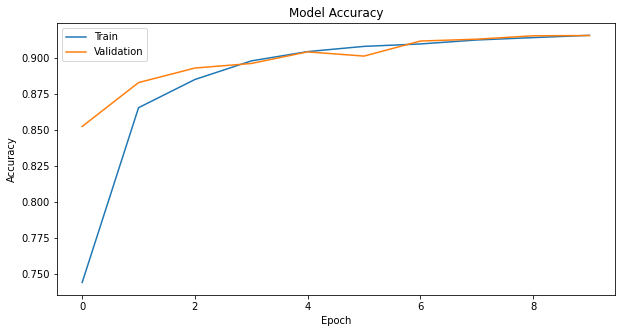

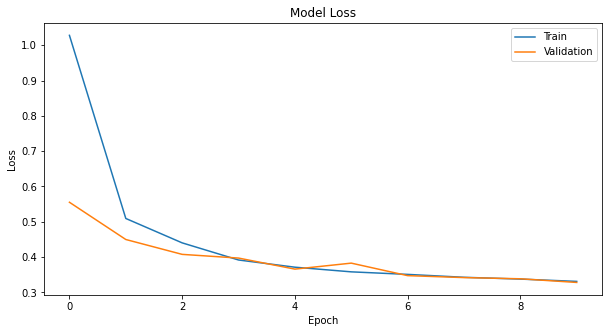

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3456
           1       0.84      0.86      0.85      2120
           2       0.91      0.96      0.94      5951
           3       0.91      0.77      0.84      2504
           4       0.90      0.80      0.85      2803
           5       0.84      0.89      0.86       284
           6       0.82      0.82      0.82      1451
           7       0.83      0.78      0.80      1818
           8       0.92      0.72      0.81       300
           9       0.84      0.84      0.84      2092
          10       0.84      0.85      0.84      1421
          11       0.95      0.94      0.94      2856
          12       0.88      0.95      0.91      3063
          13       0.91      0.86      0.88      4671
          14       0.95      0.97      0.96     14598
          15       0.95      0.94      0.94      4898
          16       0.74 

Weight regularization provides an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data, such as the validation set.


As can be seen, L2 Regularization causes that over time, the accuracy of training and validating data will not be much different and overfitting will be reduced. Validation data accuracy has also increased slightly.



### 2. dropout = 0.1

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=784, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(26,activation='softmax'))
model.add(tf.keras.layers.Dropout(0.1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
log = model.fit(x=x_train_arr, epochs=10, y=y_train_arr, batch_size = 32, validation_data=(x_test_arr, y_test_arr))

Epoch 1/10
8730/8730 [==============================] - 23s 3ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 2/10
8730/8730 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 3/10
8730/8730 [==============================] - 22s 2ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 4/10
8730/8730 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 5/10
8730/8730 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 6/10
8730/8730 [==============================] - 20s 2ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 7/10
8730/8730 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0371
Epoch 8/10
8730/8730 [=====

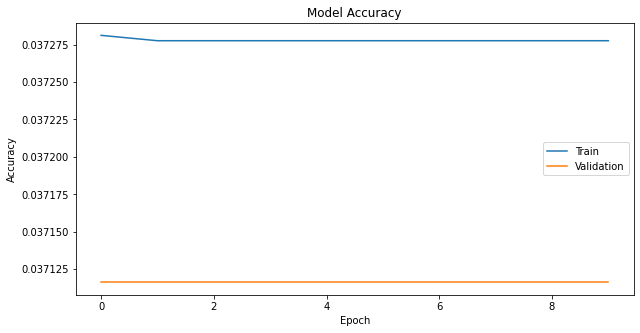

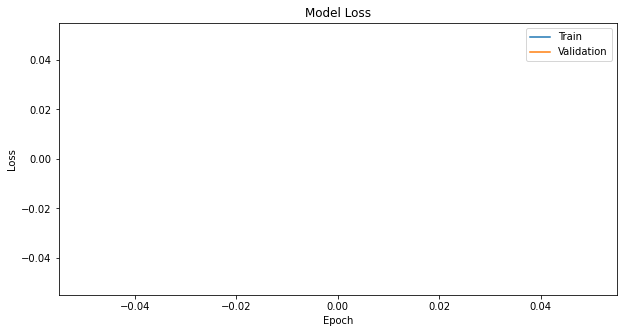

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(log.history['accuracy'], label = 'Train')
plt.plot(log.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label = 'Train')
plt.plot(log.history['val_loss'], label = 'Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_test_pred = np.argmax(model.predict(x_test_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_test_arr, axis=1)
print(classification_report(rounded_labels, x_test_pred))

2910/2910 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.04      1.00      0.07      3456
           1       0.00      0.00      0.00      2120
           2       0.00      0.00      0.00      5951
           3       0.00      0.00      0.00      2504
           4       0.00      0.00      0.00      2803
           5       0.00      0.00      0.00       284
           6       0.00      0.00      0.00      1451
           7       0.00      0.00      0.00      1818
           8       0.00      0.00      0.00       300
           9       0.00      0.00      0.00      2092
          10       0.00      0.00      0.00      1421
          11       0.00      0.00      0.00      2856
          12       0.00      0.00      0.00      3063
          13       0.00      0.00      0.00      4671
          14       0.00      0.00      0.00     14598
          15       0.00      0.00      0.00      4898
          16       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x_train_pred = np.argmax(model.predict(x_train_arr, verbose = 1), axis = 1)
rounded_labels=np.argmax(y_train_arr, axis=1)
print(classification_report(rounded_labels, x_train_pred))

8730/8730 [==============================] - 15s 2ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      1.00      0.07     10413
           1       0.00      0.00      0.00      6548
           2       0.00      0.00      0.00     17458
           3       0.00      0.00      0.00      7630
           4       0.00      0.00      0.00      8637
           5       0.00      0.00      0.00       879
           6       0.00      0.00      0.00      4311
           7       0.00      0.00      0.00      5400
           8       0.00      0.00      0.00       820
           9       0.00      0.00      0.00      6401
          10       0.00      0.00      0.00      4182
          11       0.00      0.00      0.00      8730
          12       0.00      0.00      0.00      9273
          13       0.00      0.00      0.00     14339
          14       0.00      0.00      0.00     43227
          15       0.00      0.00      0.00     14443
          16       0.00      0.00      0.00      4337
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.
During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.
Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

Dropout is a regularization technique. You should use it only to reduce variance (validation performance vs training performance).It is not intended to reduce the bias, and you should not use it in this way. it is very misleading.

there are several places when dropout can hurt performance.

Right before the last layer. This is generally a bad place to apply dropout, because the network has no ability to "correct" errors induced by dropout before the classification happens. If I read correctly, you might have put dropout right before the softmax in the iris MLP.

When the network is small relative to the dataset, regularization is usually unnecessary. If the model capacity is already low, lowering it further by adding regularization will hurt performance. I noticed most of your networks were relatively small and shallow.

When training time is limited. It's unclear if this is the case here, but if you don't train until convergence, dropout may give worse results. Usually dropout hurts performance at the start of training, but results in the final ''converged'' error being lower. Therefore, if you don't plan to train until convergence, you may not want to use dropout

In [ ]:
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb


[NbConvertApp] Converting notebook /content/NeuralNetworkP2.ipynb to html
[NbConvertApp] Writing 1104608 bytes to /content/NeuralNetworkP2.html
